In [3]:
df = pd.read_csv('/Users/kyle/Dropbox/CoAx/Projects/SSBayes/alldata_clean.csv', index_col=0)

In [5]:
edf = df[df.cond.isin(['early'])]
udf = df[df.cond.isin(['uniform'])]
ldf = df[df.cond.isin(['late'])]

In [156]:
xtl[0]

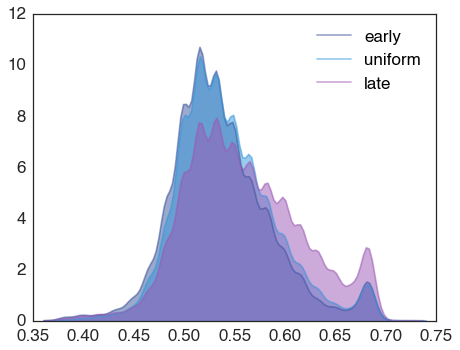

In [165]:
sns.kdeplot(edf[edf.ttype=='go'].rt, label='early', color=cc[0], alpha=.5, shade=True, bw=.007)
sns.kdeplot(udf[udf.ttype=='go'].rt, label='uniform', color=cc[1], alpha=.5, shade=True, bw=.007)
sns.kdeplot(ldf[ldf.ttype=='go'].rt, label='late', color=cc[2], alpha=.5, shade=True, bw=.007)

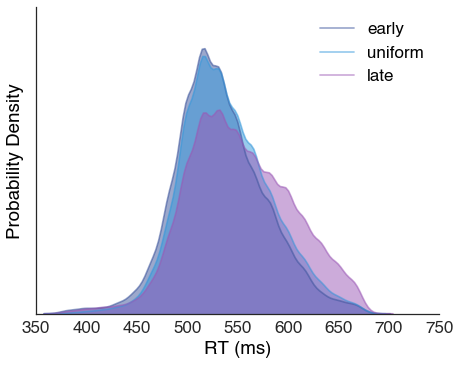

In [171]:
sns.kdeplot(edf.query('ttype=="go"&acc==1&rt<.68').rt*1000, label='early', color=cc[0], alpha=.5, shade=True, bw=8)
sns.kdeplot(udf.query('ttype=="go"&acc==1&rt<.68').rt*1000, label='uniform', color=cc[1], alpha=.5, shade=True, bw=8)
sns.kdeplot(ldf.query('ttype=="go"&acc==1&rt<.68').rt*1000, label='late', color=cc[2], alpha=.5, shade=True, bw=8)
sns.despine()

ax = plt.gca()
ax.set_yticklabels([])
ax.set_xlabel('RT (ms)')
ax.set_ylabel('Probability Density')
plt.savefig('ssbayes_rtdists_corGo.png', dpi=500)

In [19]:
e_go_rts = edf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')
u_go_rts = udf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')
l_go_rts = ldf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')

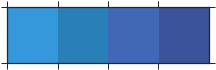

In [36]:
sns.palplot(blues)

In [38]:
from scipy.stats import distributions


In [59]:
dist = distributions.norm.rvs(loc=250, scale=35, size=5000)
dist2 = distributions.norm.rvs(loc=350, scale=35, size=5000)
dist3 = distributions.uniform()#rvs(loc=350, scale=35, size=5000)

In [68]:

dist3 = np.random.uniform(10, 500, 5000)

In [64]:
y

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

(10, 500)

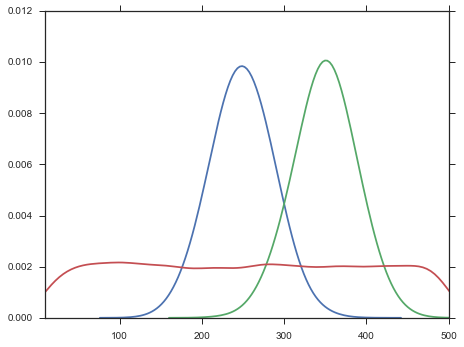

In [74]:
sns.kdeplot(dist, bw=20, clip=[10,500])
sns.kdeplot(dist2, bw=20, clip=[10,500])
sns.kdeplot(dist3, bw=20, clip=[10,500])
ax = plt.gca()
ax.set_xlim(10, 500)

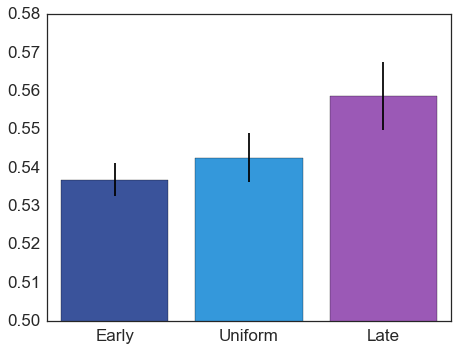

In [85]:
sns.set(style='white', font_scale=1.7)
mu = [df.mean() for df in [e_go_rts, u_go_rts, l_go_rts]]
sig = [df.sem()*1.96 for df in [e_go_rts, u_go_rts, l_go_rts]]
x = [1,2,3]
cc = [blues[-1], blues[0], purples[0]]
for i, (xx, yy) in enumerate(zip(x, mu)):
    plt.bar(xx, yy, yerr=sig[i], ecolor='k', color=cc[i], align='center')
ax = plt.gca()
ax.set_xlim(0.5,3.5)
ax.set_ylim(0.5,.58)
ax.set_xticks(x)
ax.set_xticklabels(['Early', 'Uniform', 'Late'])


In [123]:
cc

['#3A539B', '#3498db', '#9B59B6']

In [133]:
import radd
from radd import vis

In [141]:
[s.values for s in sig]

[array([ 0.02247,  0.06122,  0.05456,  0.03537,  0.02667]),
 array([ 0.02118,  0.0436 ,  0.07166,  0.04344,  0.04354]),
 array([ 0.02186,  0.05137,  0.09327,  0.07844,  0.05743])]

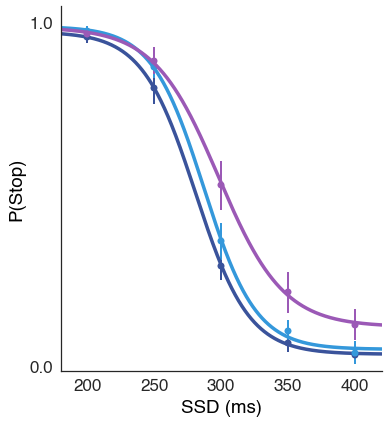

In [167]:

ax = vis.scurves(lines=[m.values for m in mu], yerr=[s.values for s in sig], kind='re', colors=cc)
plt.savefig('ssbayes_sc.png', dpi=500)

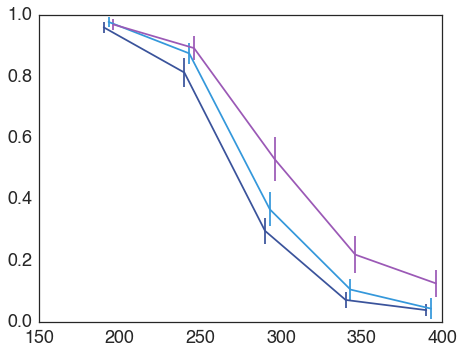

In [147]:
e_idx_stops = edf.query('ssd!=0 & ttype=="stop"').pivot_table('acc', index='idx', columns='ssd')
u_idx_stops = udf.query('ssd!=0 & ttype=="stop"').pivot_table('acc', index='idx', columns='ssd')
l_idx_stops = ldf.query('ssd!=0 & ttype=="stop"').pivot_table('acc', index='idx', columns='ssd')
idx_stops = [e_idx_stops, u_idx_stops, l_idx_stops]
mu = [df.mean() for df in idx_stops]
sig = [df.sem()*1.5 for df in idx_stops]

x = np.asarray([int(col) for col in idx_stops[0].columns])-10
for i, (xx, yy) in enumerate(zip(x, mu)):
    plt.errorbar(x+i+i*2, yy.values, yerr=sig[i].values, color=cc[i])
    
ax = plt.gca()



In [ ]:
e_go_rts = edf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')
u_go_rts = udf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')
l_go_rts = ldf.query('ttype=="go"&acc==1').pivot_table('rt', index='idx')